In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read csv files
train = pd.read_csv("new_insurance.csv")
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,Male,27,1,41,1,< 1 Year,No,37627,152,110,0
49995,49996,Male,22,1,29,1,< 1 Year,No,36014,152,268,0
49996,49997,Male,24,1,8,1,< 1 Year,No,46509,152,130,0
49997,49998,Female,48,1,33,0,1-2 Year,No,50006,124,272,0


In [3]:
#data types in train set
train.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [4]:
#check for null values in train
print(train.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [5]:
#describe raw data
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,25000.000000,38.782916,0.997720,26.434409,0.457649,30460.390648,112.421948,154.333467,0.122462
std,14433.612391,15.517882,0.047696,13.191510,0.498208,16972.091177,54.024008,83.603279,0.327822
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,12500.500000,25.000000,1.000000,15.000000,0.000000,24312.000000,30.000000,82.000000,0.000000
50%,25000.000000,36.000000,1.000000,28.000000,0.000000,31690.000000,150.000000,154.000000,0.000000
75%,37499.500000,49.000000,1.000000,35.000000,1.000000,39514.500000,152.000000,227.000000,0.000000
max,49999.000000,85.000000,1.000000,52.000000,1.000000,508073.000000,163.000000,299.000000,1.000000


In [6]:
#unique values in data in each column
train.nunique()

id                      49999
Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          24093
Policy_Sales_Channel      124
Vintage                   290
Response                    2
dtype: int64

# Data Preprocessing

In [7]:
#convert catergorical values such as Gender, Vehicle_Age, Vehicle_Damage. Used Ordinal encoding
preprocessed_train = train.copy()
preprocessed_train = preprocessed_train.drop(['id'], inplace=False, axis=1)
preprocessed_train['Gender_Ordinal'] = preprocessed_train.Gender.astype("category").cat.codes
preprocessed_train['Vehicle_Age_Ordinal'] = preprocessed_train.Vehicle_Age.astype("category").cat.codes
preprocessed_train['Vehicle_Damage_Ordinal'] = preprocessed_train.Vehicle_Damage.astype("category").cat.codes
preprocessed_train
#based on below results, it can be identified that 
# Gender - Male = 1, Female = 0
# Vehicle Damage - Yes = 1, No= 0
# Vehicle Age -  1-2 Years = 0, < 1 Year = 1, > 2 Years = 2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Ordinal,Vehicle_Age_Ordinal,Vehicle_Damage_Ordinal
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,1,2,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,1,0,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,1,2,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,1,1,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,27,1,41,1,< 1 Year,No,37627,152,110,0,1,1,0
49995,Male,22,1,29,1,< 1 Year,No,36014,152,268,0,1,1,0
49996,Male,24,1,8,1,< 1 Year,No,46509,152,130,0,1,1,0
49997,Female,48,1,33,0,1-2 Year,No,50006,124,272,0,0,0,0


In [8]:
preprocessed_train.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Ordinal,Vehicle_Age_Ordinal,Vehicle_Damage_Ordinal
Age,1.000000,-0.082684,0.037635,-0.252479,0.073034,-0.576983,0.005484,0.109828,0.144083,-0.524415,0.266826
Driving_License,-0.082684,1.000000,-0.006341,0.016137,-0.007841,0.039394,-0.002829,0.007625,-0.023057,0.035633,-0.018882
Region_Code,0.037635,-0.006341,1.000000,-0.028102,-0.005662,-0.041141,-0.008113,0.009047,-0.001445,-0.027449,0.026750
Previously_Insured,-0.252479,0.016137,-0.028102,1.000000,0.002503,0.221016,0.005024,-0.339852,-0.080863,0.175597,-0.824426
Annual_Premium,0.073034,-0.007841,-0.005662,0.002503,1.000000,-0.117867,-0.003302,0.030704,0.009414,0.023207,0.014374
Policy_Sales_Channel,-0.576983,0.039394,-0.041141,0.221016,-0.117867,1.000000,-0.002494,-0.141734,-0.112595,0.389405,-0.227143
Vintage,0.005484,-0.002829,-0.008113,0.005024,-0.003302,-0.002494,1.000000,0.001614,0.000632,-0.008368,0.002091
Response,0.109828,0.007625,0.009047,-0.339852,0.030704,-0.141734,0.001614,1.000000,0.048791,-0.105177,0.354161
Gender_Ordinal,0.144083,-0.023057,-0.001445,-0.080863,0.009414,-0.112595,0.000632,0.048791,1.000000,-0.113588,0.088745
Vehicle_Age_Ordinal,-0.524415,0.035633,-0.027449,0.175597,0.023207,0.389405,-0.008368,-0.105177,-0.113588,1.000000,-0.173761


In [9]:
#change column names by removing 'ordinal' tag at the end
preprocessed_train = preprocessed_train.drop(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis = 1)
preprocessed_train.rename(columns = {'Gender_Ordinal':'Gender', 'Vehicle_Age_Ordinal':'Vehicle_Age', 'Vehicle_Damage_Ordinal':'Vehicle_Damage'}, inplace = True)
preprocessed_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Vehicle_Age,Vehicle_Damage
0,44,1,28,0,40454,26,217,1,1,2,1
1,76,1,3,0,33536,26,183,0,1,0,0
2,47,1,28,0,38294,26,27,1,1,2,1
3,21,1,11,1,28619,152,203,0,1,1,0
4,29,1,41,1,27496,152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,27,1,41,1,37627,152,110,0,1,1,0
49995,22,1,29,1,36014,152,268,0,1,1,0
49996,24,1,8,1,46509,152,130,0,1,1,0
49997,48,1,33,0,50006,124,272,0,0,0,0


In [10]:
Region_Dict = {}
for i,a in list(zip(preprocessed_train.Region_Code.value_counts().index.unique(),preprocessed_train.Region_Code.value_counts(1)*100)):
    if a < 2:
        Region_Dict[i] = "Others"
    else:
        Region_Dict[i] = "Region_" + str(i)
Policy_Sales_Channel_Dict = {}
for i,a in list(zip(preprocessed_train.Policy_Sales_Channel.value_counts().index.unique(),preprocessed_train.Policy_Sales_Channel.value_counts(1)*100)):
    if a < 2:
        Policy_Sales_Channel_Dict[i] = "Others"
    else:
        Policy_Sales_Channel_Dict[i] = "Channel_" + str(i)
preprocessed_train.Region_Code = preprocessed_train.Region_Code.map(Region_Dict)
preprocessed_train.Policy_Sales_Channel = preprocessed_train.Policy_Sales_Channel.map(Policy_Sales_Channel_Dict)

preprocessed_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Vehicle_Age,Vehicle_Damage
0,44,1,Region_28,0,40454,Channel_26,217,1,1,2,1
1,76,1,Region_3,0,33536,Channel_26,183,0,1,0,0
2,47,1,Region_28,0,38294,Channel_26,27,1,1,2,1
3,21,1,Region_11,1,28619,Channel_152,203,0,1,1,0
4,29,1,Region_41,1,27496,Channel_152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,27,1,Region_41,1,37627,Channel_152,110,0,1,1,0
49995,22,1,Region_29,1,36014,Channel_152,268,0,1,1,0
49996,24,1,Region_8,1,46509,Channel_152,130,0,1,1,0
49997,48,1,Others,0,50006,Channel_124,272,0,0,0,0


In [11]:
# Split raw data
preprocessed_train_input = preprocessed_train.copy()
raw_targets = preprocessed_train_input['Response']
raw_inputs = preprocessed_train_input.drop(['Response'], axis = 1)
raw_inputs_train_USD,raw_inputs_test_USD,raw_targets_train_USD,raw_targets_test_USD = train_test_split(raw_inputs,raw_targets,test_size=0.2,random_state=42)
print(Counter(raw_targets_train_USD))

Counter({0: 35102, 1: 4897})


In [12]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
OHE = OneHotEncoder(drop="first",handle_unknown="error").fit(raw_inputs_train_USD[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]])

In [13]:
xtrain_cat = pd.DataFrame(OHE.transform(raw_inputs_train_USD[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=raw_inputs_train_USD.index)

D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
xtest_cat = pd.DataFrame(OHE.transform(raw_inputs_test_USD[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=raw_inputs_test_USD.index)

D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
xtrain_cat.head()

,x0_1,x1_1,x2_1,x2_2,x3_1,x4_Region_11,x4_Region_15,x4_Region_28,x4_Region_29,x4_Region_3,...,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
39086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30892,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45277,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13653,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
raw_inputs_train_USD = raw_inputs_train_USD.merge(xtrain_cat,left_index=True,right_index=True).drop(["Region_Code","Policy_Sales_Channel"],axis=1)

In [17]:
raw_inputs_test_USD = raw_inputs_test_USD.merge(xtest_cat,left_index=True,right_index=True).drop(["Region_Code","Policy_Sales_Channel"],axis=1)

In [18]:
raw_inputs_train_USD

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Gender,Vehicle_Age,Vehicle_Damage,x0_1,x1_1,...,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
39086,24,1,0,2630,291,0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30892,34,1,0,24530,49,0,0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45277,25,1,1,33041,226,1,1,0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16398,40,1,0,23973,263,1,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13653,24,1,1,34645,192,1,1,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,63,1,1,31394,274,1,0,0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,56,1,1,2630,29,1,0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,50,1,0,37767,169,1,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,42,1,0,30408,74,1,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
preprocessed_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Vehicle_Age,Vehicle_Damage
0,44,1,Region_28,0,40454,Channel_26,217,1,1,2,1
1,76,1,Region_3,0,33536,Channel_26,183,0,1,0,0
2,47,1,Region_28,0,38294,Channel_26,27,1,1,2,1
3,21,1,Region_11,1,28619,Channel_152,203,0,1,1,0
4,29,1,Region_41,1,27496,Channel_152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,27,1,Region_41,1,37627,Channel_152,110,0,1,1,0
49995,22,1,Region_29,1,36014,Channel_152,268,0,1,1,0
49996,24,1,Region_8,1,46509,Channel_152,130,0,1,1,0
49997,48,1,Others,0,50006,Channel_124,272,0,0,0,0


In [20]:
#scale columns using standard scaler
standard_scaled_train = preprocessed_train.copy()
numeric_cols=['Age','Annual_Premium','Vintage']
scaler = StandardScaler()
scaler.fit(standard_scaled_train[numeric_cols])
standard_scaled_train[numeric_cols] = scaler.transform(standard_scaled_train[numeric_cols])
standard_scaled_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Vehicle_Age,Vehicle_Damage
0,0.336202,1,Region_28,0,0.588832,Channel_26,0.749578,1,1,2,1
1,2.398359,1,Region_3,0,0.181218,Channel_26,0.342891,0,1,0,0
2,0.529529,1,Region_28,0,0.461563,Channel_26,-1.523083,1,1,2,1
3,-1.145974,1,Region_11,1,-0.108496,Channel_152,0.582119,0,1,1,0
4,-0.630435,1,Region_41,1,-0.174664,Channel_152,-1.379547,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,-0.759320,1,Region_41,1,0.422263,Channel_152,-0.530289,0,1,1,0
49995,-1.081532,1,Region_29,1,0.327223,Channel_152,1.359608,0,1,1,0
49996,-0.952647,1,Region_8,1,0.945598,Channel_152,-0.291062,0,1,1,0
49997,0.593971,1,Others,0,1.151644,Channel_124,1.407453,0,0,0,0


In [21]:
#scale columns using minmax scaler
minmax_scaled_train = preprocessed_train.copy()
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(minmax_scaled_train[numeric_cols])
minmax_scaled_train[numeric_cols] = minmax_scaler.transform(minmax_scaled_train[numeric_cols])
minmax_scaled_train


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Vehicle_Age,Vehicle_Damage
0,0.369231,1,Region_28,0,0.074833,Channel_26,0.716263,1,1,2,1
1,0.861538,1,Region_3,0,0.061146,Channel_26,0.598616,0,1,0,0
2,0.415385,1,Region_28,0,0.070560,Channel_26,0.058824,1,1,2,1
3,0.015385,1,Region_11,1,0.051418,Channel_152,0.667820,0,1,1,0
4,0.138462,1,Region_41,1,0.049196,Channel_152,0.100346,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,0.107692,1,Region_41,1,0.069240,Channel_152,0.346021,0,1,1,0
49995,0.030769,1,Region_29,1,0.066049,Channel_152,0.892734,0,1,1,0
49996,0.061538,1,Region_8,1,0.086813,Channel_152,0.415225,0,1,1,0
49997,0.430769,1,Others,0,0.093732,Channel_124,0.906574,0,0,0,0


In [22]:

# Split data for sampling. Training and testing will be done later

# Split standard sclaed data
standard_scaled_train_input = standard_scaled_train.copy()

# select columns that are highly correlated with result
#ig_corr_std = standard_scaled_train_input.corr()
#ig_corr_features_std = hig_corr_std.index[abs(hig_corr_std["Response"]) >= 0.1]
#tandard_optimized = standard_scaled_train_input[hig_corr_features_std]

standard_scaled_targets = standard_scaled_train_input['Response']
standard_scaled_inputs = standard_scaled_train_input.drop(['Response'], axis = 1)
standard_scaled_train_inputs, standard_scaled_test_inputs, standard_scaled_train_targets, standard_scaled_test_targets=train_test_split(standard_scaled_inputs, standard_scaled_targets, test_size=0.2, random_state=42)
print(Counter(standard_scaled_train_targets))

OHE = OneHotEncoder(drop="first",handle_unknown="error").fit(standard_scaled_train_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]])

xtrain_cat_standard = pd.DataFrame(OHE.transform(standard_scaled_train_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=standard_scaled_train_inputs.index)

xtest_cat_standard = pd.DataFrame(OHE.transform(standard_scaled_test_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=standard_scaled_test_inputs.index)

standard_scaled_train_inputs = standard_scaled_train_inputs.merge(xtrain_cat_standard,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

standard_scaled_test_inputs = standard_scaled_test_inputs.merge(xtest_cat_standard,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)


# Split min max scaled data
minmax_scaled_train_input = minmax_scaled_train.copy()

#hig_corr = minmax_scaled_train_input.corr()
#hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.1]
#minmax_optimized = minmax_scaled_train_input[hig_corr_features]

minmax_scaled_targets = minmax_scaled_train_input['Response']
minmax_scaled_inputs = minmax_scaled_train_input.drop(['Response'], axis = 1)

minmax_scaled_train_inputs, minmax_scaled_test_inputs, minmax_scaled_train_targets, minmax_scaled_test_targets=train_test_split(minmax_scaled_inputs, minmax_scaled_targets, test_size=0.2, random_state=42)

OHE = OneHotEncoder(drop="first",handle_unknown="error").fit(minmax_scaled_train_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]])

xtrain_cat_minmax = pd.DataFrame(OHE.transform(minmax_scaled_train_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=minmax_scaled_train_inputs.index)

xtest_cat_minmax = pd.DataFrame(OHE.transform(minmax_scaled_test_inputs[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=minmax_scaled_test_inputs.index)

minmax_scaled_train_inputs = minmax_scaled_train_inputs.merge(xtrain_cat_minmax,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

minmax_scaled_test_inputs = minmax_scaled_test_inputs.merge(xtest_cat_minmax,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

minmax_scaled_train_inputs

Counter({0: 35102, 1: 4897})


D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_featur

,Age,Driving_License,Annual_Premium,Vintage,x0_1,x1_1,x2_1,x2_2,x3_1,x4_Region_11,...,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
39086,0.061538,1,0.000000,0.972318,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30892,0.215385,1,0.043328,0.134948,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45277,0.076923,1,0.060167,0.747405,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16398,0.307692,1,0.042226,0.875433,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13653,0.061538,1,0.063340,0.629758,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.661538,1,0.056908,0.913495,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,0.553846,1,0.000000,0.065744,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.461538,1,0.069517,0.550173,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,0.338462,1,0.054958,0.221453,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Data Visualisation

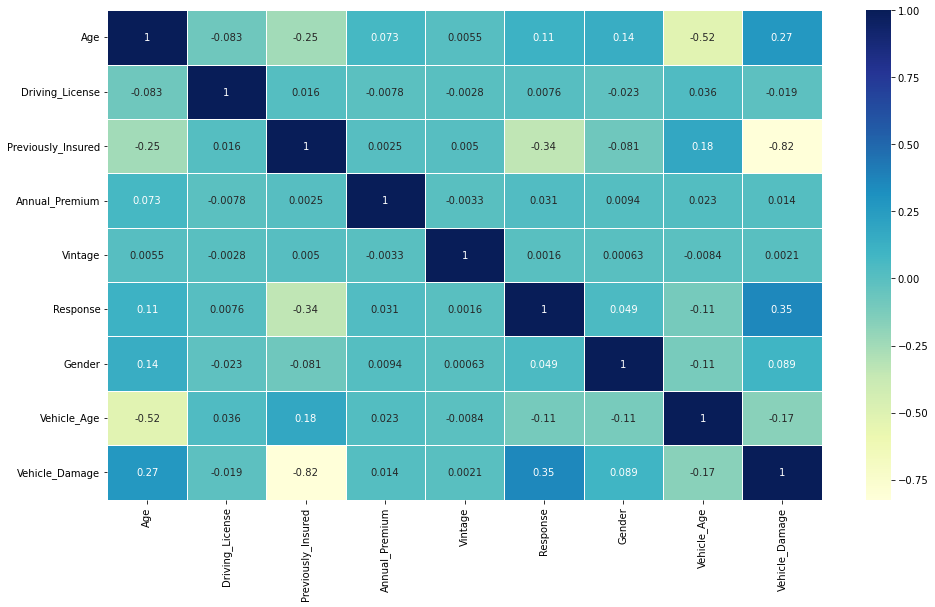

In [23]:
plt.figure(figsize=(16,9))
dataplot = sns.heatmap(preprocessed_train.corr(), cmap="YlGnBu", annot=True, linewidths =1)
plt.show()

<Figure size 1152x648 with 0 Axes>

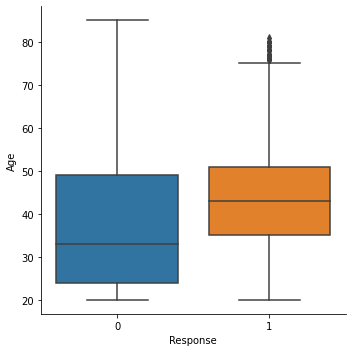

In [24]:
# Age vs Response
plt.figure(figsize=(16,9))
sns.catplot(x="Response",y="Age", data=preprocessed_train, kind='box')

<AxesSubplot:xlabel='Previously_Insured', ylabel='Count'>

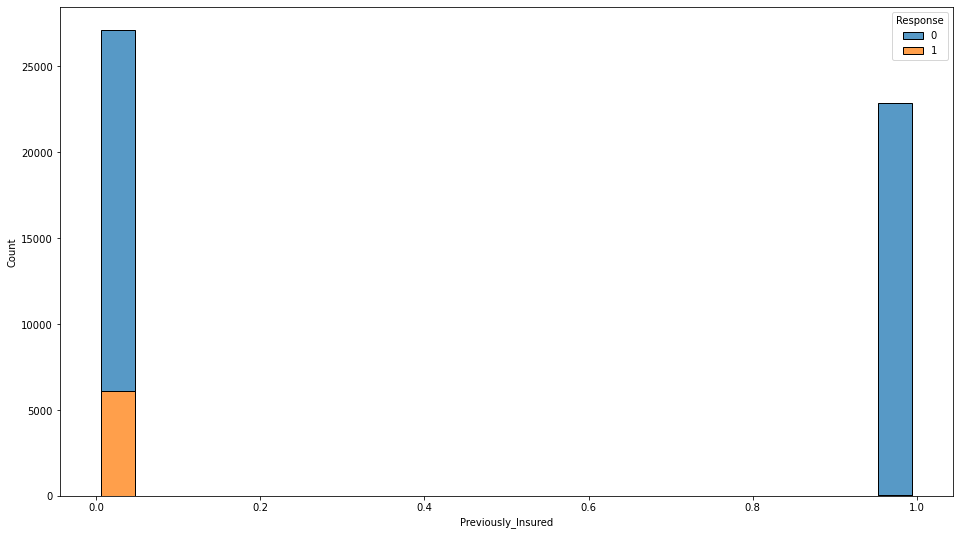

In [25]:
# Previously insured vs Response
plt.figure(figsize=(16,9))
sns.histplot(x="Previously_Insured", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = .8)

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

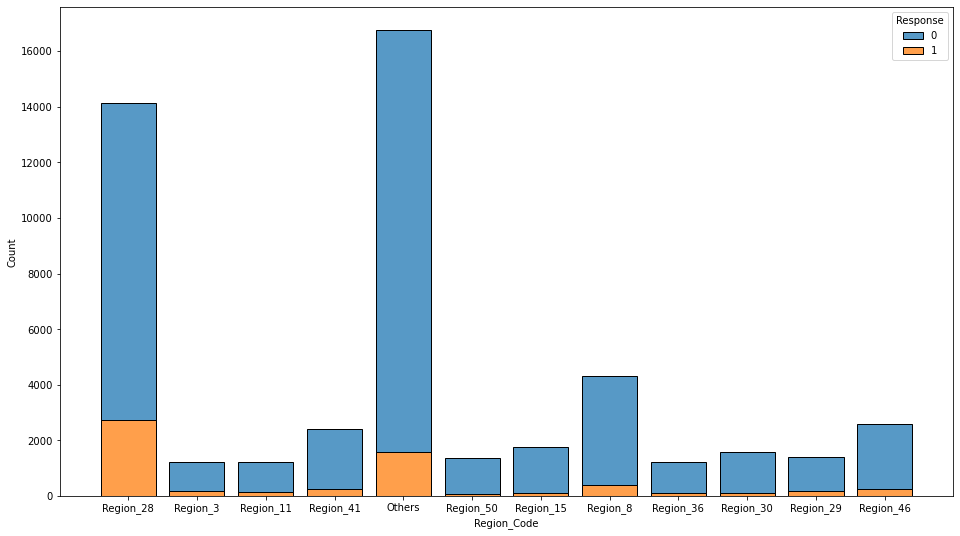

In [26]:
# Region code vs Response
plt.figure(figsize=(16,9))
sns.histplot(x="Region_Code", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = .8)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

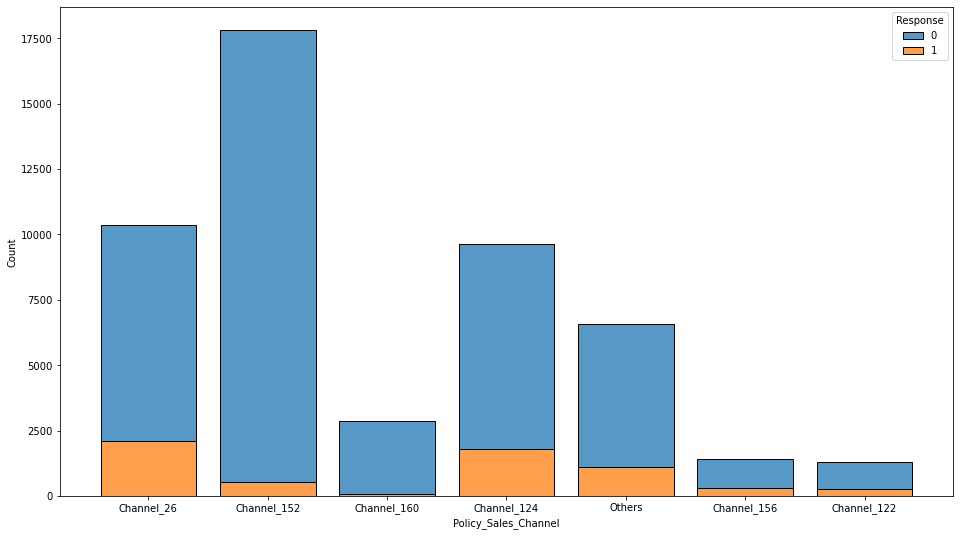

In [27]:
# Policy_Sales_Channel vs Response
plt.figure(figsize=(16,9))
sns.histplot(x="Policy_Sales_Channel", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = .8)

<AxesSubplot:xlabel='Driving_License', ylabel='Count'>

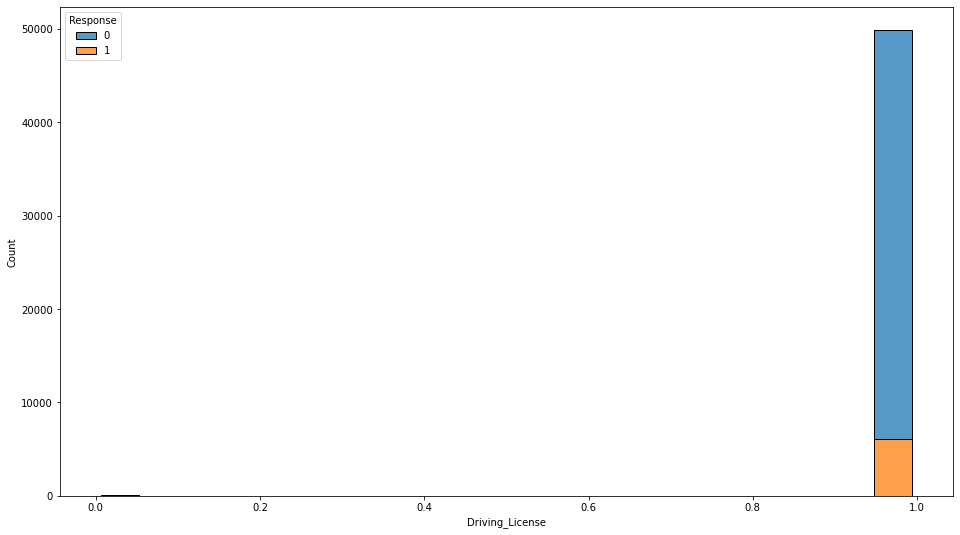

In [28]:
# Driving license vs Response
plt.figure(figsize=(16,9))
sns.histplot(x="Driving_License", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = .8)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Count'>

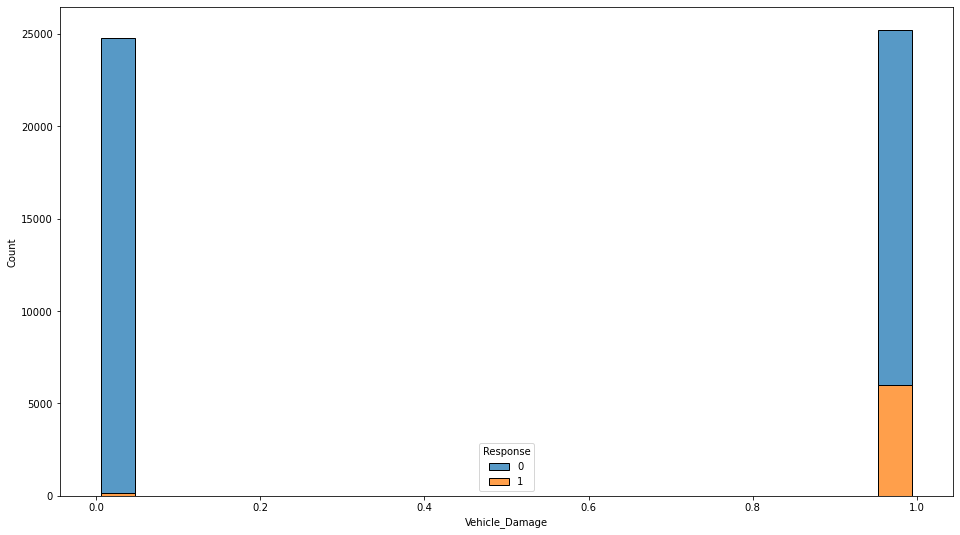

In [29]:
# vehicle damage vs Response
# Vehicle Damage - Yes = 1, No= 0
plt.figure(figsize=(16,9))
sns.histplot(x="Vehicle_Damage", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = .8)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

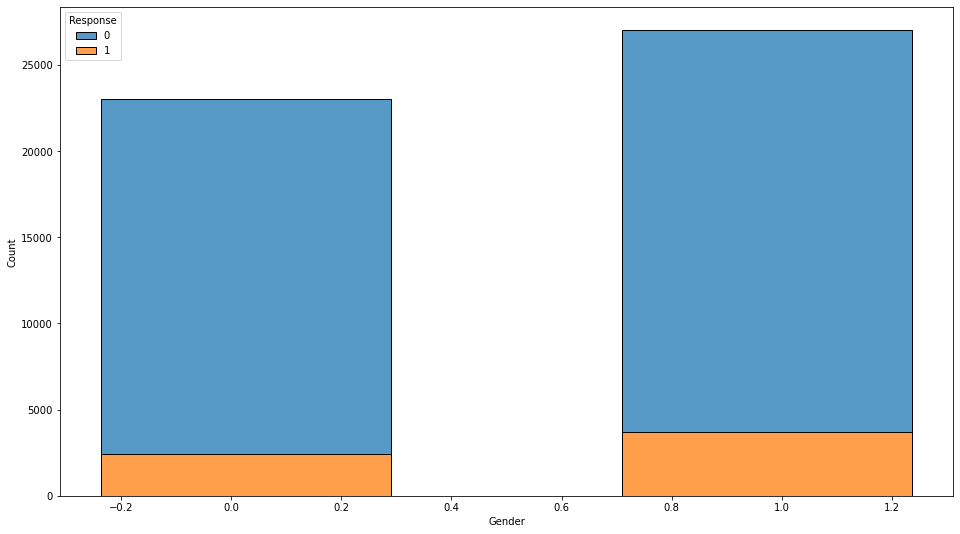

In [30]:
#Gender vs Response
# Gender - Male = 1, Female = 0
plt.figure(figsize=(16,9))
sns.histplot(x="Gender", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = 10)

<Figure size 1152x648 with 0 Axes>

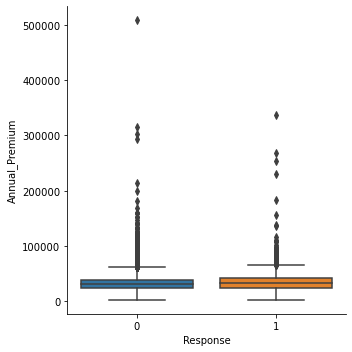

In [31]:
# Premium vs Response
plt.figure(figsize=(16,9))
sns.catplot(x="Response",y="Annual_Premium", data=preprocessed_train, kind='box')

<Figure size 1152x648 with 0 Axes>

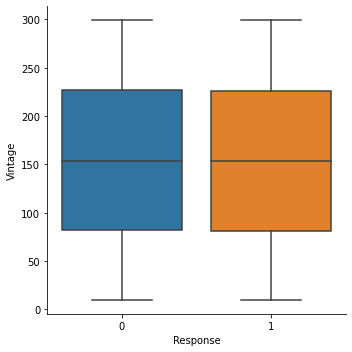

In [32]:
# Vintage vs Response
plt.figure(figsize=(16,9))
sns.catplot(x="Response",y="Vintage", data=preprocessed_train, kind='box')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Count'>

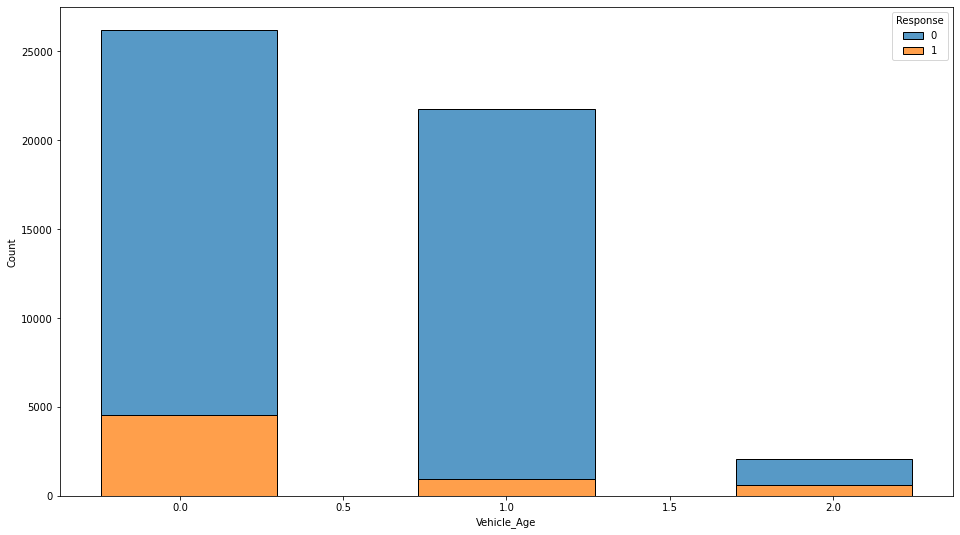

In [33]:
#Vehicle age vs Response
# Vehicle Age -  1-2 Years = 0, < 1 Year = 1, > 2 Years = 2
plt.figure(figsize=(16,9))
sns.histplot(x="Vehicle_Age", hue="Response", data=preprocessed_train, stat="count", multiple="stack", shrink = 10)

# Data Prediction

In [34]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score,f1_score,classification_report,confusion_matrix, recall_score
#RUS standard scaled logistic

undersample_pipe_RUS_LOG = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())

undersample_pipe_RUS_LOG.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

standard_scaled_test_targets_pred = undersample_pipe_RUS_LOG.predict(standard_scaled_test_inputs)

scores = cross_validate(undersample_pipe_RUS_LOG,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm


test_roc_auc 0.8456196701854681
test_average_precision 0.33567660054095455
F1 score =  0.4213362068965517
Precision score =  0.2701520036849378
Recall score =  0.9567699836867863
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      8774
           1       0.27      0.96      0.42      1226

    accuracy                           0.68     10000
   macro avg       0.63      0.80      0.60     10000
weighted avg       0.90      0.68      0.73     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5658, 1: 4342})


array([[5605, 3169],
       [  53, 1173]], dtype=int64)

In [35]:
#RUS minmax scaled logistic
undersample_pipe_RUS_LOG_minmax = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())

undersample_pipe_RUS_LOG_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = undersample_pipe_RUS_LOG_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(undersample_pipe_RUS_LOG_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))


print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.8446655962682413
test_average_precision 0.33442774206099524
F1 score =  0.42434210526315796
Precision score =  0.2734338200659444
Recall score =  0.9469820554649266
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      8774
           1       0.27      0.95      0.42      1226

    accuracy                           0.69     10000
   macro avg       0.63      0.80      0.60     10000
weighted avg       0.90      0.68      0.74     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5754, 1: 4246})


array([[5689, 3085],
       [  65, 1161]], dtype=int64)

In [36]:
#ROS standard scaled logistic
pipe_ROS_LOG = make_imb_pipeline(RandomOverSampler(), LogisticRegression())

pipe_ROS_LOG.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

print(pipe_ROS_LOG.score(standard_scaled_test_inputs, standard_scaled_test_targets))
standard_scaled_test_targets_pred = pipe_ROS_LOG.predict(standard_scaled_test_inputs)


scores = cross_validate(pipe_ROS_LOG,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

0.6842
test_roc_auc 0.8459253296901121
test_average_precision 0.33517053214733694
F1 score =  0.4247723132969034
Precision score =  0.27345215759849906
Recall score =  0.9510603588907015
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      8774
           1       0.27      0.95      0.42      1226

    accuracy                           0.68     10000
   macro avg       0.63      0.80      0.60     10000
weighted avg       0.90      0.68      0.74     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5736, 1: 4264})


array([[5676, 3098],
       [  60, 1166]], dtype=int64)

In [37]:
#ROS minmax scaled logistic
pipe_ROS_LOG_minmax = make_imb_pipeline(RandomOverSampler(), LogisticRegression())

pipe_ROS_LOG_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = pipe_ROS_LOG_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(pipe_ROS_LOG_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.8461149097304057
test_average_precision 0.33622573624711966
F1 score =  0.42395644283121586
Precision score =  0.2726423902894491
Recall score =  0.9526916802610114
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      8774
           1       0.27      0.95      0.42      1226

    accuracy                           0.68     10000
   macro avg       0.63      0.80      0.60     10000
weighted avg       0.90      0.68      0.74     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5716, 1: 4284})


array([[5658, 3116],
       [  58, 1168]], dtype=int64)

In [38]:
#RUS standard scaled Random forest
undersample_pipe_RUS_RFC = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier())

undersample_pipe_RUS_RFC.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

print(undersample_pipe_RUS_RFC.score(standard_scaled_test_inputs, standard_scaled_test_targets))

standard_scaled_test_targets_pred = undersample_pipe_RUS_RFC.predict(standard_scaled_test_inputs)


scores = cross_validate(undersample_pipe_RUS_RFC,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

0.7165
test_roc_auc 0.835067790247803
test_average_precision 0.3207187029171519
F1 score =  0.42646166295771804
Precision score =  0.2835620123755717
Recall score =  0.8597063621533442
Test Performance:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8774
           1       0.28      0.86      0.43      1226

    accuracy                           0.72     10000
   macro avg       0.63      0.78      0.62     10000
weighted avg       0.89      0.72      0.76     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 6283, 1: 3717})


array([[6111, 2663],
       [ 172, 1054]], dtype=int64)

In [39]:
#RUS minmax scaled Random forest
undersample_pipe_RUS_RFC_minmax = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier())
undersample_pipe_RUS_RFC_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)


minmax_scaled_test_targets_pred = undersample_pipe_RUS_RFC_minmax.predict(minmax_scaled_test_inputs)


scores = cross_validate(undersample_pipe_RUS_RFC_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.8347528601278169
test_average_precision 0.31893899996969255
F1 score =  0.42346836958690875
Precision score =  0.28031704095112286
Recall score =  0.865415986949429
Test Performance:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      8774
           1       0.28      0.87      0.42      1226

    accuracy                           0.71     10000
   macro avg       0.63      0.78      0.62     10000
weighted avg       0.89      0.71      0.76     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 6215, 1: 3785})


array([[6050, 2724],
       [ 165, 1061]], dtype=int64)

In [40]:
#ROS standard scaled Random forest
pipe_ROS_RFC = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier())

pipe_ROS_RFC.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

print(pipe_ROS_RFC.score(standard_scaled_test_inputs, standard_scaled_test_targets))

standard_scaled_test_targets_pred = pipe_ROS_RFC.predict(standard_scaled_test_inputs)


scores = cross_validate(pipe_ROS_RFC,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

0.8457
test_roc_auc 0.83035511067898
test_average_precision 0.3152125135773222
F1 score =  0.31330663106364043
Precision score =  0.34476003917727716
Recall score =  0.28711256117455136
Test Performance:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8774
           1       0.34      0.29      0.31      1226

    accuracy                           0.85     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.83      0.85      0.84     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 8979, 1: 1021})


array([[8105,  669],
       [ 874,  352]], dtype=int64)

In [41]:
#ROS minmax scaled Random forest
undersample_pipe_ROS_RFC_minmax = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier())
undersample_pipe_ROS_RFC_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = undersample_pipe_ROS_RFC_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(undersample_pipe_ROS_RFC_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.8290721411542681
test_average_precision 0.31223077648453473
F1 score =  0.31319910514541394
Precision score =  0.3468780971258672
Recall score =  0.28548123980424145
Test Performance:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8774
           1       0.35      0.29      0.31      1226

    accuracy                           0.85     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.83      0.85      0.84     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 8991, 1: 1009})


array([[8115,  659],
       [ 876,  350]], dtype=int64)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
#RUS standard scaled KNN
undersample_pipe_RUS_KNN = make_imb_pipeline(RandomUnderSampler(), KNeighborsClassifier(3))

undersample_pipe_RUS_KNN.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

standard_scaled_test_targets_pred = undersample_pipe_RUS_KNN.predict(standard_scaled_test_inputs)

scores = cross_validate(undersample_pipe_RUS_KNN,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

test_roc_auc 0.7942721624084337
test_average_precision 0.26484169460667706
F1 score =  0.39828431372549017
Precision score =  0.2656675749318801
Recall score =  0.7952691680261011
Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      8774
           1       0.27      0.80      0.40      1226

    accuracy                           0.71     10000
   macro avg       0.61      0.74      0.60     10000
weighted avg       0.88      0.71      0.76     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 6330, 1: 3670})


array([[6079, 2695],
       [ 251,  975]], dtype=int64)

In [43]:
#ROS standard scaled KNN
pipe_ROS_KNN = make_imb_pipeline(RandomOverSampler(), KNeighborsClassifier(3))

pipe_ROS_KNN.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

standard_scaled_test_targets_pred = pipe_ROS_KNN.predict(standard_scaled_test_inputs)


scores = cross_validate(pipe_ROS_KNN,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

test_roc_auc 0.7040579343857043
test_average_precision 0.227870902709728
F1 score =  0.36424041075203867
Precision score =  0.2892086330935252
Recall score =  0.49184339314845027
Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      8774
           1       0.29      0.49      0.36      1226

    accuracy                           0.79     10000
   macro avg       0.61      0.66      0.62     10000
weighted avg       0.84      0.79      0.81     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 7915, 1: 2085})


array([[7292, 1482],
       [ 623,  603]], dtype=int64)

In [44]:
#RUS minmax scaled KNN
undersample_pipe_RUS_KNN_minmax = make_imb_pipeline(RandomUnderSampler(), KNeighborsClassifier(3))

undersample_pipe_RUS_KNN_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = undersample_pipe_RUS_KNN_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(undersample_pipe_RUS_KNN_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.8021769427251746
test_average_precision 0.2736056443332317
F1 score =  0.41172800998128506
Precision score =  0.27630477253698016
Recall score =  0.8075040783034257
Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      8774
           1       0.28      0.81      0.41      1226

    accuracy                           0.72     10000
   macro avg       0.62      0.76      0.61     10000
weighted avg       0.88      0.72      0.76     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 6417, 1: 3583})


array([[6181, 2593],
       [ 236,  990]], dtype=int64)

In [45]:
#ROS minmax scaled KNN
undersample_pipe_ROS_KNN_minmax = make_imb_pipeline(RandomOverSampler(), KNeighborsClassifier(3))

undersample_pipe_ROS_KNN_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = undersample_pipe_ROS_KNN_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(undersample_pipe_ROS_KNN_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.7048390201374513
test_average_precision 0.2297334025897631
F1 score =  0.35453723243895086
Precision score =  0.2812051649928264
Recall score =  0.4796084828711256
Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      8774
           1       0.28      0.48      0.35      1226

    accuracy                           0.79     10000
   macro avg       0.60      0.65      0.61     10000
weighted avg       0.84      0.79      0.81     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 7909, 1: 2091})


array([[7271, 1503],
       [ 638,  588]], dtype=int64)

In [46]:
from imblearn.over_sampling import SMOTE
#SMOTE standard scaled logistic
pipe_SMOTE_LOG = make_imb_pipeline(SMOTE(), LogisticRegression())

pipe_SMOTE_LOG.fit(standard_scaled_train_inputs, standard_scaled_train_targets)



standard_scaled_test_targets_pred = pipe_SMOTE_LOG.predict(standard_scaled_test_inputs)

scores = cross_validate(pipe_SMOTE_LOG,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

test_roc_auc 0.8439360617926968
test_average_precision 0.3305081362191921
F1 score =  0.4279379157427938
Precision score =  0.2766364070711897
Recall score =  0.9445350734094616
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.65      0.79      8774
           1       0.28      0.94      0.43      1226

    accuracy                           0.69     10000
   macro avg       0.63      0.80      0.61     10000
weighted avg       0.90      0.69      0.74     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5814, 1: 4186})


array([[5746, 3028],
       [  68, 1158]], dtype=int64)

In [47]:
#SMOTE standard scaled RFC
pipe_SMOTE_RFC = make_imb_pipeline(SMOTE(), RandomForestClassifier())

pipe_SMOTE_RFC.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

print(pipe_SMOTE_RFC.score(standard_scaled_test_inputs, standard_scaled_test_targets))
standard_scaled_test_targets_pred = pipe_SMOTE_RFC.predict(standard_scaled_test_inputs)


scores = cross_validate(pipe_SMOTE_RFC,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

0.8214
test_roc_auc 0.833946840545272
test_average_precision 0.3176420590784328
F1 score =  0.37156931738212534
Precision score =  0.32673267326732675
Recall score =  0.43066884176182707
Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      8774
           1       0.33      0.43      0.37      1226

    accuracy                           0.82     10000
   macro avg       0.62      0.65      0.63     10000
weighted avg       0.84      0.82      0.83     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 8384, 1: 1616})


array([[7686, 1088],
       [ 698,  528]], dtype=int64)

In [48]:
#SMOTE minmax scaled RFC
pipe_SMOTE_RFC_minmax = make_imb_pipeline(SMOTE(), RandomForestClassifier())

pipe_SMOTE_RFC_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

print(pipe_SMOTE_RFC_minmax.score(minmax_scaled_test_inputs, minmax_scaled_test_targets))

minmax_scaled_test_targets_pred = pipe_SMOTE_RFC_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(pipe_SMOTE_RFC_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

0.8111
test_roc_auc 0.8327835330512565
test_average_precision 0.31884410394885043
F1 score =  0.37841395195788086
Precision score =  0.31715388858246
Recall score =  0.46900489396411094
Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8774
           1       0.32      0.47      0.38      1226

    accuracy                           0.81     10000
   macro avg       0.62      0.66      0.63     10000
weighted avg       0.85      0.81      0.83     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 8187, 1: 1813})


array([[7536, 1238],
       [ 651,  575]], dtype=int64)

In [49]:
# KNN SMOTE minmax
pipe_SMOTE_KNN = make_imb_pipeline(SMOTE(), KNeighborsClassifier(3))

pipe_SMOTE_KNN.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = pipe_SMOTE_KNN.predict(minmax_scaled_test_inputs)

scores = cross_validate(pipe_SMOTE_KNN,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

test_roc_auc 0.7452311215061844
test_average_precision 0.25003934109096804
F1 score =  0.37252240021721417
Precision score =  0.2792022792022792
Recall score =  0.5595432300163132
Test Performance:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      8774
           1       0.28      0.56      0.37      1226

    accuracy                           0.77     10000
   macro avg       0.60      0.68      0.62     10000
weighted avg       0.85      0.77      0.80     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 7543, 1: 2457})


array([[7003, 1771],
       [ 540,  686]], dtype=int64)

In [50]:
#raw data random forest
pipe_raw_log = make_imb_pipeline(LogisticRegression())

pipe_raw_log.fit(raw_inputs_train_USD, raw_targets_train_USD)

raw_targets_test_USD_pred = pipe_raw_log.predict(raw_inputs_test_USD)

scores = cross_validate(pipe_raw_log,
                        raw_inputs_train_USD, raw_targets_train_USD, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", metrics.f1_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Precision score = ", precision_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Recall score = ", recall_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Test Performance:",classification_report(raw_targets_test_USD, raw_targets_test_USD_pred),sep="\n")
print("Actual = ", Counter(raw_targets_test_USD))
print("Predicted = ", Counter(raw_targets_test_USD_pred))
cm = confusion_matrix(raw_targets_test_USD,raw_targets_test_USD_pred)
cm

D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

test_roc_auc 0.7929935250376394
test_average_precision 0.29843311744704454
F1 score =  0.0
Precision score =  0.0
Recall score =  0.0
Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      8774
           1       0.00      0.00      0.00      1226

    accuracy                           0.88     10000
   macro avg       0.44      0.50      0.47     10000
weighted avg       0.77      0.88      0.82     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 10000})


D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:13

array([[8774,    0],
       [1226,    0]], dtype=int64)

In [51]:
# KNN raw
pipe_raw_KNN = make_imb_pipeline(KNeighborsClassifier(3))

pipe_raw_KNN.fit(raw_inputs_train_USD, raw_targets_train_USD)

raw_targets_test_USD_pred = pipe_raw_KNN.predict(raw_inputs_test_USD)

scores = cross_validate(pipe_raw_KNN,
                        raw_inputs_train_USD, raw_targets_train_USD, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", metrics.f1_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Precision score = ", precision_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Recall score = ", recall_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Test Performance:",classification_report(raw_targets_test_USD, raw_targets_test_USD_pred),sep="\n")
print("Actual = ", Counter(raw_targets_test_USD))
print("Predicted = ", Counter(raw_targets_test_USD_pred))
cm = confusion_matrix(raw_targets_test_USD,raw_targets_test_USD_pred)
cm

test_roc_auc 0.5433175993220265
test_average_precision 0.1363023444983325
F1 score =  0.09267734553775744
Precision score =  0.15517241379310345
Recall score =  0.06606851549755302
Test Performance:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8774
           1       0.16      0.07      0.09      1226

    accuracy                           0.84     10000
   macro avg       0.52      0.51      0.50     10000
weighted avg       0.79      0.84      0.81     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 9478, 1: 522})


array([[8333,  441],
       [1145,   81]], dtype=int64)

In [52]:
# raw RFC unscaled
pipe_raw_RFC = make_imb_pipeline(RandomForestClassifier())

pipe_raw_RFC.fit(raw_inputs_train_USD, raw_targets_train_USD)

raw_targets_test_USD_pred = pipe_raw_RFC.predict(raw_inputs_test_USD)

scores = cross_validate(pipe_raw_RFC,
                        raw_inputs_train_USD, raw_targets_train_USD, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", metrics.f1_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Precision score = ", precision_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Recall score = ", recall_score(raw_targets_test_USD, raw_targets_test_USD_pred))
print("Test Performance:",classification_report(raw_targets_test_USD, raw_targets_test_USD_pred),sep="\n")
print("Actual = ", Counter(raw_targets_test_USD))
print("Predicted = ", Counter(raw_targets_test_USD_pred))
cm = confusion_matrix(raw_targets_test_USD,raw_targets_test_USD_pred)
cm

test_roc_auc 0.8305404561317937
test_average_precision 0.3151250847333152
F1 score =  0.19377568995889607
Precision score =  0.34591194968553457
Recall score =  0.13458401305057097
Test Performance:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      8774
           1       0.35      0.13      0.19      1226

    accuracy                           0.86     10000
   macro avg       0.62      0.55      0.56     10000
weighted avg       0.82      0.86      0.84     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 9523, 1: 477})


array([[8462,  312],
       [1061,  165]], dtype=int64)

In [53]:
#SMOTE minmax scaled Logistic
pipe_SMOTE_log_minmax = make_imb_pipeline(SMOTE(), LogisticRegression())

pipe_SMOTE_log_minmax.fit(minmax_scaled_train_inputs, minmax_scaled_train_targets)

minmax_scaled_test_targets_pred = pipe_SMOTE_log_minmax.predict(minmax_scaled_test_inputs)

scores = cross_validate(pipe_SMOTE_log_minmax,
                        minmax_scaled_train_inputs, minmax_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Precision score = ", precision_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Recall score = ", recall_score(minmax_scaled_test_targets, minmax_scaled_test_targets_pred))
print("Test Performance:",classification_report(minmax_scaled_test_targets,minmax_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(minmax_scaled_test_targets))
print("Predicted = ", Counter(minmax_scaled_test_targets_pred))
cm = confusion_matrix(minmax_scaled_test_targets,minmax_scaled_test_targets_pred)
cm

D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\GSU_Courses\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

test_roc_auc 0.8456206256278582
test_average_precision 0.33428101752234046
F1 score =  0.4270527859237536
Precision score =  0.27541371158392436
Recall score =  0.9502446982055465
Test Performance:
              precision    recall  f1-score   support

           0       0.99      0.65      0.79      8774
           1       0.28      0.95      0.43      1226

    accuracy                           0.69     10000
   macro avg       0.63      0.80      0.61     10000
weighted avg       0.90      0.69      0.74     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 5770, 1: 4230})


array([[5709, 3065],
       [  61, 1165]], dtype=int64)

In [54]:
#SMOTE standard scaled RFC
pipe_SMOTE_KNN_standard = make_imb_pipeline(SMOTE(), KNeighborsClassifier(3))

pipe_SMOTE_KNN_standard.fit(standard_scaled_train_inputs, standard_scaled_train_targets)

print(pipe_SMOTE_KNN_standard.score(standard_scaled_test_inputs, standard_scaled_test_targets))
standard_scaled_test_targets_pred = pipe_SMOTE_KNN_standard.predict(standard_scaled_test_inputs)


scores = cross_validate(pipe_SMOTE_KNN_standard,
                        standard_scaled_train_inputs, standard_scaled_train_targets, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("test_roc_auc", scores['test_roc_auc'].mean())
print("test_average_precision", scores['test_average_precision'].mean())
print("F1 score = ", f1_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Precision score = ", precision_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Recall score = ", recall_score(standard_scaled_test_targets, standard_scaled_test_targets_pred))
print("Test Performance:",classification_report(standard_scaled_test_targets,standard_scaled_test_targets_pred),sep="\n")
print("Actual = ", Counter(standard_scaled_test_targets))
print("Predicted = ", Counter(standard_scaled_test_targets_pred))
cm = confusion_matrix(standard_scaled_test_targets,standard_scaled_test_targets_pred)
cm

0.7793
test_roc_auc 0.7344027144764697
test_average_precision 0.2434629876924979
F1 score =  0.381965835900308
Precision score =  0.2908315565031983
Recall score =  0.5562805872756933
Test Performance:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      8774
           1       0.29      0.56      0.38      1226

    accuracy                           0.78     10000
   macro avg       0.61      0.68      0.62     10000
weighted avg       0.85      0.78      0.81     10000

Actual =  Counter({0: 8774, 1: 1226})
Predicted =  Counter({0: 7655, 1: 2345})


array([[7111, 1663],
       [ 544,  682]], dtype=int64)